0.5416408618633877


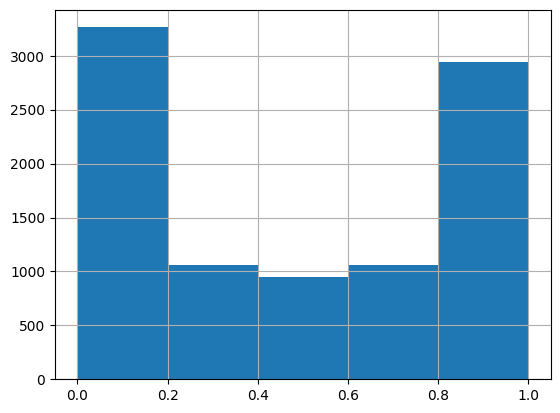

In [2]:
from snownlp import SnowNLP, sentiment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modelpath="model/MovieComment.marshal"
Modelpath="Model/MovieComment.marshal"

def get_comment_score(comment):
    s = SnowNLP(comment)
    return s.sentiments


def Calculate_sentiment(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        comment = f.readlines()
    # Convert to DataFrame
    df = pd.DataFrame(comment, columns=['comment'])
    # Drop rows with missing values
    df['comment'] = df['comment'].fillna('')
    df = df.dropna()
    df['sentiment'] = df['comment'].apply(lambda x: SnowNLP(x).sentiments)
    return df


def Calculate_sentiment2(file_path):
    # Read the xlsx file
    comment = pd.read_excel(file_path)
    # All [like] +1
    comment['like'] = comment['like'] + 1
    # Convert to DataFrame
    df = comment
    # Drop rows with missing values
    df['comment'] = df['comment'].fillna('')
    df = df.dropna()
    # Transform all the comments to string
    df['comment'] = df['comment'].astype(str)
    df['sentiment'] = df['comment'].apply(lambda x: SnowNLP(x).sentiments)
    return df


def draw_hist(df):
    df['sentiment'].hist(bins=5)
    plt.show()


if __name__ == "__main__":
    sentiment.load(Modelpath)
    df1 = Calculate_sentiment2('流浪地球.xlsx')
    # Sum of all [like]
    sum_like = df1['like'].sum()
    # sentiment times like
    df1['sentiment_like'] = df1['sentiment'] * df1['like']
    # sentiment times like sum
    mean_sentiment = df1['sentiment_like'].sum() / sum_like
    print(mean_sentiment)
    draw_hist(df1)
    


In [5]:
# Print the sentiment < 0.1
df_out=df1[df1['sentiment']<0.1]

# Save the sentiment < 0.1 to a new xlsx file
df_out.to_excel('流浪地球_sentiment.xlsx', index=False)


In [7]:
from snownlp import SnowNLP,sentiment
Modelpath="model/MovieComment-1.marshal"
sentiment.load(Modelpath)

comment="我在里面演的都是日本人，不算丢中国人的脸"
s = SnowNLP(comment)
print(s.sentiments)

0.0952849205362084
